# 평균모멘텀스코어 채권 혼합 그림 2-29
- 10년 국채 10.58%/-13.5%, 20년 국채 15.48%/-14.3%
- 투자 기간 : 2002년 1월 ~2017년 6월
- 투자 대상 : 코스피200 지수, 10년 (또는 20년) 만기 국고채 지수
- 매수 규칙 : 주식 :채권 = 코스피200 최근 12개월 평균 모멘텀 스코어:10년(또는 20년) 만기 국고채 지수 최근 12개월 평균 모멘텀 스코어 
- 매도 규칙 : 매달 말 위의 투자 비중을 새로 계산하여 주식 :채권 투자 비중을 조절하여 반복
- 변동성 역가중 전략과 비교 그림 2-30
  - 10년 국채 8.3%/-11.9%
  - 20년 국채 13.2%/-19.1%

% 책과 내가 가진 data에서 차이가 많이 난다.

In [1]:
from settings import *

In [2]:
tickers = ['kodex200', 'kodex200x2', 'kbond10y', 'kbond20y']
read_df = get_data()
read_df = read_df[tickers]
read_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5433 entries, 2000-01-04 to 2021-12-30
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   kodex200    5433 non-null   float64
 1   kodex200x2  5433 non-null   float64
 2   kbond10y    5433 non-null   float64
 3   kbond20y    5433 non-null   float64
dtypes: float64(4)
memory usage: 212.2 KB


In [3]:
data = read_df['2001':].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5192 entries, 2001-01-02 to 2021-12-30
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   kodex200    5192 non-null   float64
 1   kodex200x2  5192 non-null   float64
 2   kbond10y    5192 non-null   float64
 3   kbond20y    5192 non-null   float64
dtypes: float64(4)
memory usage: 202.8 KB


In [4]:
data_m = data.resample('M').last()

In [14]:
data_m

,kodex200,kodex200x2,kbond10y,kbond20y
Date,,,,
2001-01-31,5399.557,2646.599,43868.022,26635.995
2001-02-28,5001.863,2250.113,43020.189,25323.303
2001-03-31,4524.382,1821.285,41386.414,23286.861
2001-04-30,5037.971,2225.925,40446.990,22198.035
2001-05-31,5298.891,2440.313,42346.314,24270.278
...,...,...,...,...
2021-08-31,41985.000,26760.000,122270.000,133685.000
2021-09-30,40195.000,24560.000,119220.000,126480.000
2021-10-31,38825.000,22935.000,115900.000,118975.000


In [15]:
s = '2001-01-30'
e = '2017-6-30'
start = '2002-01-30'

In [11]:
score_주식_채권10년 = 평균모멘텀스코어(data_m[['kodex200', 'kbond10y']])
score_주식_채권20년 = 평균모멘텀스코어(data_m[['kodex200', 'kbond20y']])

score_주식2x_채권10년 = 평균모멘텀스코어(data_m[['kodex200x2', 'kbond10y']])
score_주식2x_채권20년 = 평균모멘텀스코어(data_m[['kodex200x2', 'kbond20y']])

In [12]:
weights_주식_채권10년 = score_주식_채권10년.div(score_주식_채권10년.sum(axis=1), axis=0)
weights_주식_채권20년 = score_주식_채권20년.div(score_주식_채권20년.sum(axis=1), axis=0)

weights_주식2x_채권10년 = score_주식2x_채권10년.div(score_주식2x_채권10년.sum(axis=1), axis=0)
weights_주식2x_채권20년 = score_주식2x_채권20년.div(score_주식2x_채권20년.sum(axis=1), axis=0)

In [13]:
weights_주식_채권10년.dropna().head()

,kodex200,kbond10y
Date,,
2002-01-31,0.632,0.368
2002-02-28,0.545,0.455
2002-03-31,0.800,0.200
2002-04-30,0.550,0.450
2002-05-31,0.474,0.526


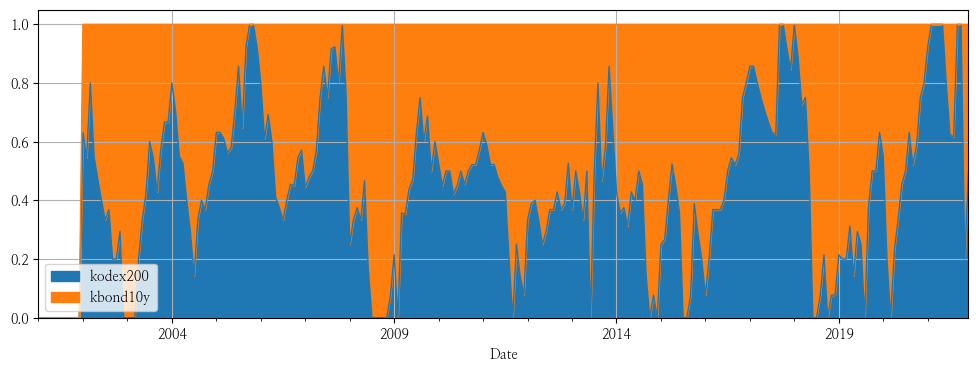

In [16]:
weights_주식_채권10년.plot.area(figsize=(12,4));

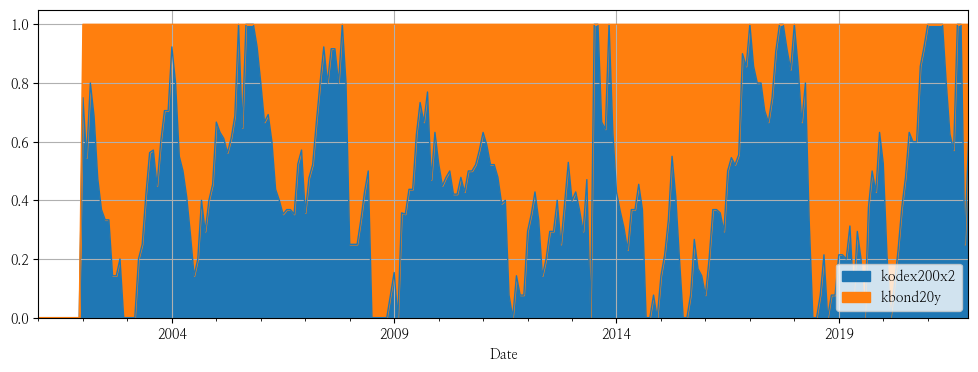

In [17]:
weights_주식2x_채권20년.plot.area(figsize=(12,4));

In [34]:
def momentumscore(data, weights, name="MomScore", start='1986-1-03'):
    st = bt.Strategy(
        name,
        [
            bt.algos.RunMonthly(run_on_end_of_period=False), # 월말
            bt.algos.RunAfterDate(start), #1년 뒤부터 시작 : 시작전 12개월 데이터 필요
            bt.algos.SelectAll(),
            bt.algos.WeighTarget(weights),
#             bt.algos.PrintInfo("{now} {temp}"), #{_price} {_universe}
            PrintTempWeights(),
            bt.algos.Rebalance()
        ]
    )
    return bt.Backtest(st, data, initial_capital=100000000.0)

In [35]:
# shift(1)을 하면 전달 기준으로 모멘텀 계산

bt_ms주식채권10년 = momentumscore(data_m[['kodex200', 'kbond10y']], weights_주식_채권10년, '10년국채모멘텀')
bt_ms주식채권20년 = momentumscore(data_m[['kodex200', 'kbond20y']], weights_주식_채권20년, '20년국채모멘텀')

bt_ms주식2x채권10년 = momentumscore(data_m[['kodex200x2', 'kbond10y']], weights_주식2x_채권10년, '주식2x_10년국채모멘텀')
bt_ms주식2x채권20년 = momentumscore(data_m[['kodex200x2', 'kbond20y']], weights_주식2x_채권20년, '주식2x_20년국채모멘텀')

In [36]:
bt_kospi = long_only_ew(data_m, ['kodex200'], 'kodex200')
bt_채권10년 = long_only_ew(data_m, ['kbond10y'], '채권10년')
bt_채권20년 = long_only_ew(data_m, ['kbond20y'], '채권20년')

In [37]:
r0 = bt.run(bt_ms주식채권10년, bt_ms주식2x채권10년, bt_ms주식채권20년, 
            bt_ms주식2x채권20년, bt_kospi, bt_채권10년, bt_채권20년)

2001-01-31 00:00:00 10년국채모멘텀 
2001-02-28 00:00:00 10년국채모멘텀 
2001-03-31 00:00:00 10년국채모멘텀 
2001-04-30 00:00:00 10년국채모멘텀 
2001-05-31 00:00:00 10년국채모멘텀 
2001-06-30 00:00:00 10년국채모멘텀 
2001-07-31 00:00:00 10년국채모멘텀 
2001-08-31 00:00:00 10년국채모멘텀 
2001-09-30 00:00:00 10년국채모멘텀 
2001-10-31 00:00:00 10년국채모멘텀 
2001-11-30 00:00:00 10년국채모멘텀 
2001-12-31 00:00:00 10년국채모멘텀 
2002-01-31 00:00:00 10년국채모멘텀 kodex200:0.632 kbond10y:0.368 
2002-02-28 00:00:00 10년국채모멘텀 kodex200:0.545 kbond10y:0.455 
2002-03-31 00:00:00 10년국채모멘텀 kodex200:0.800 kbond10y:0.200 
2002-04-30 00:00:00 10년국채모멘텀 kodex200:0.550 kbond10y:0.450 
2002-05-31 00:00:00 10년국채모멘텀 kodex200:0.474 kbond10y:0.526 
2002-06-30 00:00:00 10년국채모멘텀 kodex200:0.400 kbond10y:0.600 
2002-07-31 00:00:00 10년국채모멘텀 kodex200:0.333 kbond10y:0.667 
2002-08-31 00:00:00 10년국채모멘텀 kodex200:0.368 kbond10y:0.632 
2002-09-30 00:00:00 10년국채모멘텀 kodex200:0.200 kbond10y:0.800 
2002-10-31 00:00:00 10년국채모멘텀 kodex200:0.200 kbond10y:0.800 
2002-11-30 00:00:00 10년국채모멘텀 kodex200:0.

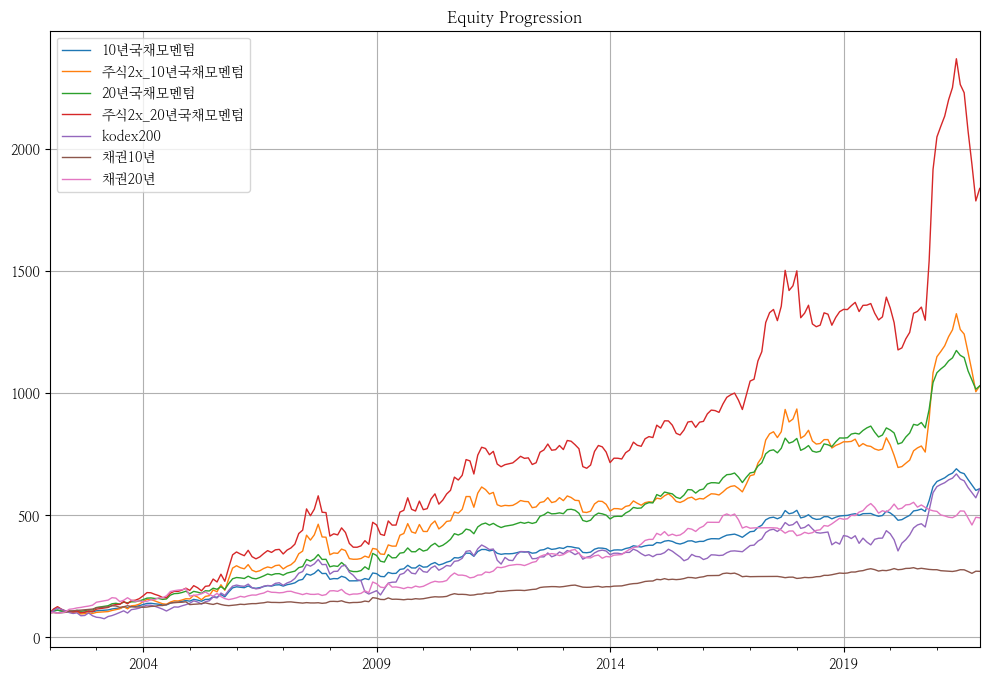

In [38]:
r0.set_date_range(start)
r0.plot(figsize=(12,8));

In [39]:
r0.stats

,10년국채모멘텀,주식2x_10년국채모멘텀,20년국채모멘텀,주식2x_20년국채모멘텀,kodex200,채권10년,채권20년
start,2002-01-31 00:00:00,2002-01-31 00:00:00,2002-01-31 00:00:00,2002-01-31 00:00:00,2002-01-31 00:00:00,2002-01-31 00:00:00,2002-01-31 00:00:00
end,2021-12-31 00:00:00,2021-12-31 00:00:00,2021-12-31 00:00:00,2021-12-31 00:00:00,2021-12-31 00:00:00,2021-12-31 00:00:00,2021-12-31 00:00:00
rf,0.000,0.000,0.000,0.000,0.000,0.000,0.000
total_return,5.087,9.299,9.292,17.379,5.085,1.703,3.894
cagr,0.095,0.124,0.124,0.157,0.095,0.051,0.083
max_drawdown,-0.164,-0.310,-0.206,-0.363,-0.455,-0.108,-0.225
calmar,0.579,0.401,0.603,0.433,0.209,0.473,0.369
mtd,0.012,0.024,0.013,0.029,0.065,-0.002,-0.004
three_month,-0.058,-0.117,-0.057,-0.114,-0.008,0.002,0.001
six_month,-0.118,-0.223,-0.124,-0.224,-0.091,-0.007,-0.018


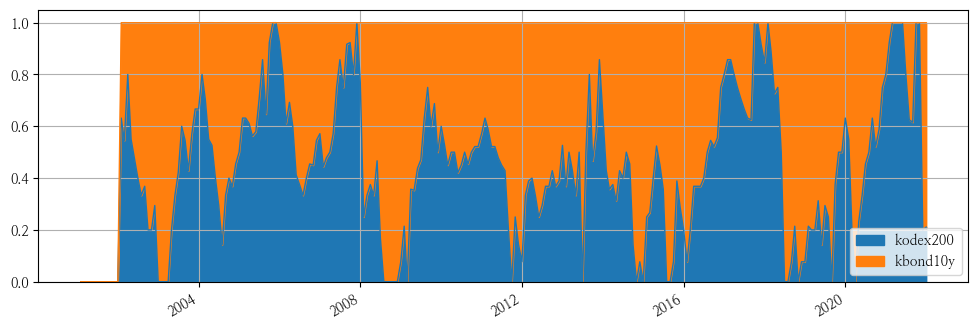

In [40]:
r0.get_security_weights('10년국채모멘텀').plot.area(figsize=(12,4));

In [41]:
r_kospi = bt.run(bt_kospi)
r_10 = bt.run(bt_ms주식채권10년)
r_20 = bt.run(bt_ms주식채권20년)

## 그림 2.29

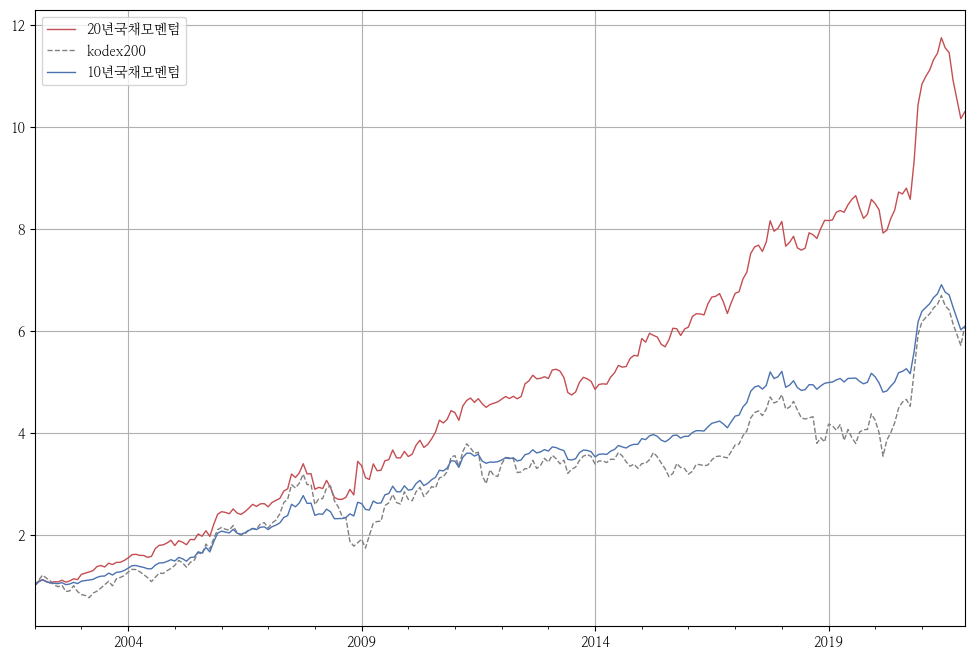

In [42]:
r_20.set_date_range(start)
r_kospi.set_date_range(start)
r_10.set_date_range(start)

ax1 = r_20.prices.rebase(1).plot(color='r', figsize=(12,8));
r_kospi.prices.rebase(1).plot(ax=ax1, ls='--', color='gray', figsize=(12, 8));
r_10.prices.rebase(1).plot(ax=ax1, ls='-', color='b', figsize=(12, 8));

In [43]:
# qs.reports.full(r_all.prices['모멘텀 포트폴리오(현금혼합)'].to_returns().dropna()['1986':],
#                 r_all.prices['KOSPI'].to_returns().dropna()['1986':])

# 일일데이터

In [50]:
# 월말에 계산하고 다음월 첫 거래일 종가로 거래 한다고 전재
# 12개월 평균모멘텀스코어 계산

class WeighAMS(bt.Algo):
    def __init__(self, lag, months):
        super(WeighAMS, self).__init__()
        self.lag = lag
        self.months = months

    def 평균모멘텀스코어(self, 데이터, 개월):
        초기값 = 0
        for i in range(1, 개월+1):
            초기값 += np.where(데이터 / 데이터.shift(i) > 1, 1, 0)
        return 초기값[-1]/개월

    def AMS(self, prc):
        ''' x : Series (DataFrame의 컬럼)
            x[-1] : 기준일. x의 현재값
            (오늘날짜/과거날짜 - 1) > 0 보다 크면 1, 아니면 0
            => 오늘날짜/과거날짜 > 1 => 오늘날짜 > 과거날짜  => x[-1] > x
        '''
        average_momentum_score = pd.Series(dtype='float64')
        # print(f"{list(np.where(x[-1]>x, 1, 0)[:-1])}, {len(np.where(x[-1]>x, 1, 0)[:-1])}")
        for c in prc.columns:
            average_momentum_score[c] = np.mean(np.where(prc[c][-1]>prc[c], 1, 0)[:-1])# 당일 날짜 비교는 제외해준다 [:-1]

        return average_momentum_score

    def __call__(self, target):
        selected = target.temp['selected'].copy()

        t0 = (target.now - pd.DateOffset(months=self.lag)).strftime("%Y-%m")
        start = (target.now - pd.DateOffset(months=self.lag) - pd.DateOffset(months=self.months)).strftime("%Y-%m")

        print(f"\nprc : {target.now} {t0} ~ {start}")
        prc = target.universe[selected].loc[start:t0].resample('M').last()
        if (len(prc) < self.months+1):
            return False

        weights = pd.Series(self.AMS(prc), index=selected)
        weights = weights/weights.sum()

        # print(self.평균모멘텀스코어(prc, self.months), prc)
        target.temp['weights'] = weights

        return True

In [51]:
def average_momentum_score_strategy(name, data, tickers, lag=1, months=12):
    st = bt.Strategy(name,
        [
            bt.algos.RunMonthly(run_on_first_date=True,
                                run_on_end_of_period=True, #월초
                                run_on_last_date=False),
            bt.algos.SelectThese(tickers),
            WeighAMS(lag, months), # lags=0이면 위와 같다.
            PrintTempWeights(),
            bt.algos.Rebalance()
        ]
    )
    return bt.Backtest(st, data, initial_capital=100000000)

일간 데이터 : data

In [52]:
bt_daily_12 = average_momentum_score_strategy('10년국채모멘텀1', data, 
                                              ['kodex200', 'kbond10y'], lag=0)
r_daily_12 = bt.run(bt_daily_12)

r_00 = bt.run(bt_daily_12, bt_ms주식채권10년)


prc : 2001-01-02 00:00:00 2001-01 ~ 2000-01

prc : 2001-01-31 00:00:00 2001-01 ~ 2000-01

prc : 2001-02-28 00:00:00 2001-02 ~ 2000-02

prc : 2001-03-30 00:00:00 2001-03 ~ 2000-03

prc : 2001-04-30 00:00:00 2001-04 ~ 2000-04

prc : 2001-05-31 00:00:00 2001-05 ~ 2000-05

prc : 2001-06-29 00:00:00 2001-06 ~ 2000-06

prc : 2001-07-31 00:00:00 2001-07 ~ 2000-07

prc : 2001-08-31 00:00:00 2001-08 ~ 2000-08

prc : 2001-09-28 00:00:00 2001-09 ~ 2000-09

prc : 2001-10-31 00:00:00 2001-10 ~ 2000-10

prc : 2001-11-30 00:00:00 2001-11 ~ 2000-11

prc : 2001-12-28 00:00:00 2001-12 ~ 2000-12

prc : 2002-01-31 00:00:00 2002-01 ~ 2001-01
2002-01-31 00:00:00 10년국채모멘텀1 kodex200:0.632 kbond10y:0.368 

prc : 2002-02-28 00:00:00 2002-02 ~ 2001-02
2002-02-28 00:00:00 10년국채모멘텀1 kodex200:0.545 kbond10y:0.455 

prc : 2002-03-29 00:00:00 2002-03 ~ 2001-03
2002-03-29 00:00:00 10년국채모멘텀1 kodex200:0.800 kbond10y:0.200 

prc : 2002-04-30 00:00:00 2002-04 ~ 2001-04
2002-04-30 00:00:00 10년국채모멘텀1 kodex200:0.550 kbond10

In [53]:
# 처음과 동일함을 검증(로직)
r_00.set_date_range(start)
r_00.display()

Stat                 10년국채모멘텀1    10년국채모멘텀
-------------------  -----------------  ----------------
Start                2002-01-31         2002-01-31
End                  2021-11-30         2021-11-30
Risk-free rate       0.00%              0.00%

Total Return         501.73%            501.73%
Daily Sharpe         -                  -
Daily Sortino        -                  -
CAGR                 9.47%              9.47%
Max Drawdown         -16.40%            -16.40%
Calmar Ratio         0.58               0.58

MTD                  -                  -
3m                   -12.82%            -12.82%
6m                   -9.52%             -9.52%
YTD                  7.55%              7.55%
1Y                   7.55%              7.55%
3Y (ann.)            6.95%              6.95%
5Y (ann.)            8.00%              8.00%
10Y (ann.)           5.81%              5.81%
Since Incep. (ann.)  9.47%              9.47%

Daily Sharpe         -                  -
Daily Sortino        - 

In [54]:
bt_daily_10 = average_momentum_score_strategy('10년국채모멘텀(일간)', data, 
                                              ['kodex200', 'kbond10y'], lag=0)
bt_daily_20 = average_momentum_score_strategy('20년국채모멘텀(일간)', data, 
                                              ['kodex200', 'kbond20y'], lag=0)

bt_daily_2x_10 = average_momentum_score_strategy('10년국채모멘텀(일간,x2)', data, 
                                                 ['kodex200x2', 'kbond10y'], lag=0)
bt_daily_2x_20 = average_momentum_score_strategy('20년국채모멘텀(일간,x2)', data, 
                                                 ['kodex200x2', 'kbond20y'], lag=0)

In [55]:
r_daily = bt.run(bt_daily_10, bt_daily_2x_10, bt_daily_20, bt_daily_2x_20)


prc : 2001-01-02 00:00:00 2001-01 ~ 2000-01

prc : 2001-01-31 00:00:00 2001-01 ~ 2000-01

prc : 2001-02-28 00:00:00 2001-02 ~ 2000-02

prc : 2001-03-30 00:00:00 2001-03 ~ 2000-03

prc : 2001-04-30 00:00:00 2001-04 ~ 2000-04

prc : 2001-05-31 00:00:00 2001-05 ~ 2000-05

prc : 2001-06-29 00:00:00 2001-06 ~ 2000-06

prc : 2001-07-31 00:00:00 2001-07 ~ 2000-07

prc : 2001-08-31 00:00:00 2001-08 ~ 2000-08

prc : 2001-09-28 00:00:00 2001-09 ~ 2000-09

prc : 2001-10-31 00:00:00 2001-10 ~ 2000-10

prc : 2001-11-30 00:00:00 2001-11 ~ 2000-11

prc : 2001-12-28 00:00:00 2001-12 ~ 2000-12

prc : 2002-01-31 00:00:00 2002-01 ~ 2001-01
2002-01-31 00:00:00 10년국채모멘텀(일간) kodex200:0.632 kbond10y:0.368 

prc : 2002-02-28 00:00:00 2002-02 ~ 2001-02
2002-02-28 00:00:00 10년국채모멘텀(일간) kodex200:0.545 kbond10y:0.455 

prc : 2002-03-29 00:00:00 2002-03 ~ 2001-03
2002-03-29 00:00:00 10년국채모멘텀(일간) kodex200:0.800 kbond10y:0.200 

prc : 2002-04-30 00:00:00 2002-04 ~ 2001-04
2002-04-30 00:00:00 10년국채모멘텀(일간) kodex200:0

In [57]:
r_daily.set_date_range(start)
r_daily.stats

,10년국채모멘텀(일간),"10년국채모멘텀(일간,x2)",20년국채모멘텀(일간),"20년국채모멘텀(일간,x2)"
start,2002-01-30 00:00:00,2002-01-30 00:00:00,2002-01-30 00:00:00,2002-01-30 00:00:00
end,2021-12-30 00:00:00,2021-12-30 00:00:00,2021-12-30 00:00:00,2021-12-30 00:00:00
rf,0.000,0.000,0.000,0.000
total_return,5.087,9.299,9.292,17.379
cagr,0.095,0.124,0.124,0.157
max_drawdown,-0.183,-0.334,-0.239,-0.408
calmar,0.520,0.372,0.519,0.386
mtd,0.012,0.024,0.013,0.029
three_month,-0.058,-0.117,-0.057,-0.114
six_month,-0.118,-0.223,-0.124,-0.224


In [58]:
r_daily.prices.to_drawdown_series().describe()

,10년국채모멘텀(일간),"10년국채모멘텀(일간,x2)",20년국채모멘텀(일간),"20년국채모멘텀(일간,x2)"
count,4926.000,4926.000,4926.000,4926.000
mean,-0.039,-0.116,-0.036,-0.091
std,0.037,0.080,0.041,0.083
min,-0.183,-0.334,-0.239,-0.408
25%,-0.057,-0.173,-0.053,-0.136
50%,-0.030,-0.110,-0.022,-0.071
75%,-0.009,-0.050,-0.006,-0.025
max,0.000,0.000,0.000,0.000


In [62]:
변동성역가중 = bt.Strategy('변동성역가중',
    [
        bt.algos.RunAfterDate(start),
        bt.algos.RunMonthly(run_on_end_of_period=True), #매월말
#         bt.algos.PrintDate(),
        bt.algos.SelectAll(),
        bt.algos.WeighInvVol(lookback=pd.DateOffset(years=1), lag=pd.DateOffset(days=1)),
#         bt.algos.PrintTempData(),
        bt.algos.Rebalance()

    ])

In [63]:
bt_invvol10 = bt.Backtest(변동성역가중, data[['kodex200', 'kbond10y']], name='10년국채(변동성역가중)', initial_capital=100000000)
bt_invvol20 = bt.Backtest(변동성역가중, data[['kodex200', 'kbond20y']], name='20년국채(변동성역가중)', initial_capital=100000000)

In [64]:
r_2_30 = bt.run(bt_daily_10, bt_invvol10, bt_daily_20, bt_invvol20)

In [66]:
r_2_30.set_date_range(start)
r_2_30.stats

,10년국채모멘텀(일간),10년국채(변동성역가중),20년국채모멘텀(일간),20년국채(변동성역가중)
start,2002-01-30 00:00:00,2002-01-30 00:00:00,2002-01-30 00:00:00,2002-01-30 00:00:00
end,2021-12-30 00:00:00,2021-12-30 00:00:00,2021-12-30 00:00:00,2021-12-30 00:00:00
rf,0.000,0.000,0.000,0.000
total_return,5.087,2.501,9.292,5.104
cagr,0.095,0.065,0.124,0.095
max_drawdown,-0.183,-0.137,-0.239,-0.228
calmar,0.520,0.473,0.519,0.417
mtd,0.012,0.012,0.013,0.020
three_month,-0.058,0.003,-0.057,0.002
six_month,-0.118,-0.019,-0.124,-0.036


# 그림 2.30

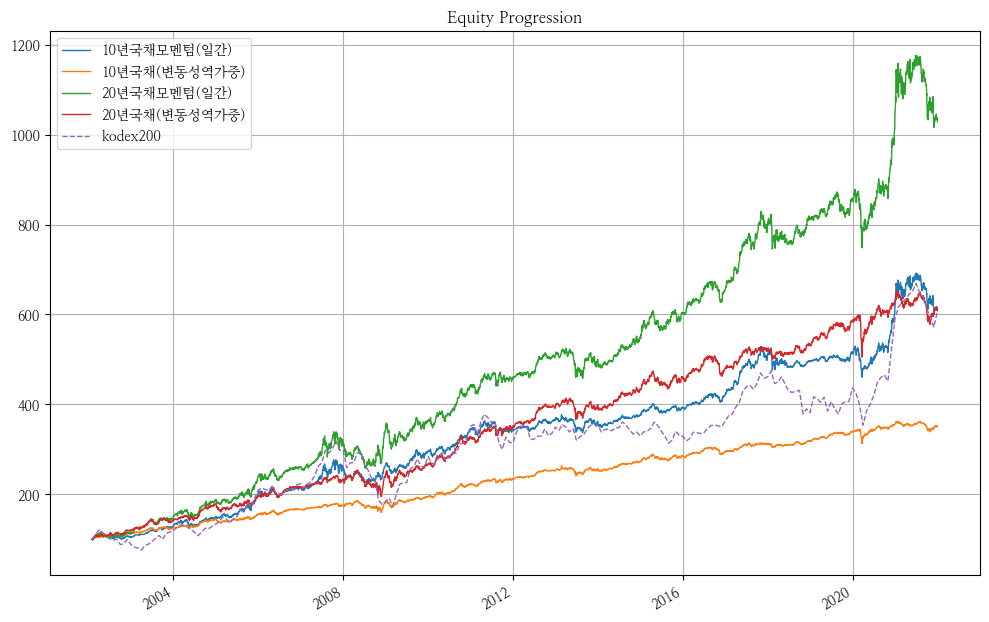

In [67]:
r_kospi.set_date_range(start)
ax1 = r_2_30.plot(figsize=(12,8));
r_kospi.plot(ax=ax1, ls='--', figsize=(12,8));

책의 그림과 많이 다른데....성능이 책 만큼 나오지 않았다.